In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
df=pd.DataFrame()
filenames = glob("csv/S06/DAILYDATA_S06_*.csv")
#tryyy = pd.read_csv("csv/S06/DAILYDATA_S06_198002.csv")
#tryyy
for filename in filenames:
    #try:
    other_df = pd.read_csv(filename, encoding='windows-1252')
    other_df = other_df.replace({'—': np.nan})
    other_df = other_df[["Year","Month","Day","Daily Rainfall Total (mm)"]]
    #print(other_df)
    #do test.py filename
    
    df = df.append(other_df,ignore_index=True)
    #except UnicodeDecodeError:
        #pass
    ##other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    #other_df = other_df["Year","Month","Day","Daily Rainfall"]
#another_df = df.set_index("station_id").sort_index()
#filenames
df=df.dropna()
df

,Year,Month,Day,Daily Rainfall Total (mm)
0,1980,1,1,0
1,1980,1,2,0
2,1980,1,3,0
3,1980,1,4,0
4,1980,1,5,12.8
5,1980,1,6,25.5
6,1980,1,7,9.1
7,1980,1,8,0
8,1980,1,9,0
9,1980,1,10,0


In [19]:
from sklearn.cluster import KMeans
#import plot_labelled_scatter

X = df["Daily Rainfall Total (mm)"]
X=X.values.reshape(-1,1)
X
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

#plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
label = kmeans.predict(X)

In [25]:
clusters = {}
n = 0
for item in label:
    if item in clusters:
        clusters[item].append(df.iloc[n]["Daily Rainfall Total (mm)"])
    else:
        clusters[item] = [df.iloc[n]["Daily Rainfall Total (mm)"]]
    n +=1

In [27]:
for item in clusters:
    print("Cluster ", item)
    for i in clusters[item]:
        print(i)

Cluster  1
0.0
0.0
0.0
0.0
12.8
9.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
4.9
0.6
0.0
0.0
1.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1
0.0
0.0
0.0
0.0
0.0
2.4
0.0
0.0
0.0
0.0
0.0
0.0
0.7
0.0
6.8
0.6
10.1
0.0
0.0
8.1
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.0
5.4
0.0
0.1
0.0
0.0
0.0
0.0
2.1
0.0
6.9
0.7
11.5
11.3
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3
0.2
0.0
0.0
6.6
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
3.0
11.5
0.6
1.8
7.3
9.2
0.0
0.0
3.2
2.9
9.2
13.9
0.4
0.5
0.0
0.0
0.1
13.0
4.9
0.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.3
0.0
0.0
0.0
0.0
0.0
0.1
7.6
0.0
0.0
0.0
1.0
2.0
0.0
3.6
7.1
0.0
0.0
0.0
0.0
0.0
0.0
11.0
3.0
0.0
2.4
0.0
0.0
0.0
0.0
0.5
3.5
10.1
0.0
0.0
0.0
0.0
0.0
0.6
0.0
0.0
0.0
0.0
0.0
0.0
0.3
0.0
0.0
0.0
0.0
5.2
6.0
4.9
3.2
7.5
7.1
0.0
3.2
4.7
2.9
0.0
0.7
0.0
0.0
0.0
0.0
0.0
5.6
0.0
6.3
0.0
0.0
0.4
0.0
0.2
0.3
1.8
1.9
0.0
7.6
0.0
0.0
0.3
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6
9.2
3.8
0.0
0.0
0.2
9.5
0.2
0.0
1.8
0.0
2.3
5.9
0.0
3.6
0.0
0.0
3.7
0.0
0.0
0.0
1.5
0.0
9.9
12.8
0.0
0.0
0.0
10.

0.0
0.0
0.0
0.5
0.0
2.5
13.2
0.0
0.0
0.7
0.4
0.0
3.2
0.1
3.2
0.0
0.0
0.0
0.4
0.0
0.0
0.6
0.0
3.6
0.0
1.2
0.0
0.0
3.8
0.9
0.0
0.0
7.3
1.4
0.0
0.0
0.0
11.2
0.0
0.0
0.0
0.0
0.0
11.9
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.8
0.0
0.0
0.0
4.8
10.0
0.0
8.5
0.6
10.8
0.0
6.6
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
3.9
2.4
2.3
0.0
4.5
3.3
0.0
0.0
0.0
1.9
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.2
0.0
0.0
0.0
1.1
14.4
1.7
0.0
11.0
4.9
4.6
0.0
0.0
1.8
0.1
0.0
0.0
4.6
14.3
0.0
2.4
0.0
2.7
0.0
0.0
0.0
0.0
0.5
0.7
4.6
6.7
4.3
1.3
0.0
6.4
0.0
1.3
0.0
6.9
3.9
0.0
0.0
0.0
0.7
0.0
0.7
0.0
0.0
0.0
6.6
11.1
10.1
0.4
0.0
3.5
0.0
0.0
0.0
3.9
0.0
0.0
0.0
0.0
0.0
0.0
0.6
0.0
0.0
0.0
11.0
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.8
13.5
12.5
1.1
0.0
0.0
0.8
0.0
0.0
0.0
1.7
0.0
6.6
7.0
0.6
0.9
0.0
0.0
14.2
0.0
0.0
0.6
11.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
3.3
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.7
0.0
0.0
0.0
0.0
2.6
2.6
0.0
0.0
4.0
5.3
3.2
0.0
0.0
1.6
1.3
0.0
0.0
1.0
4.0
0

0.0
2.3
0.0
0.0
2.9
0.0
0.0
7.5
0.0
0.0
0.3
0.0
9.5
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.6
8.4
3.7
0.9
4.6
0.0
1.7
0.0
0.0
12.9
0.5
0.1
0.0
0.0
0.3
0.0
0.0
0.1
0.0
0.0
4.7
0.0
0.0
0.0
0.0
0.0
7.6
0.0
1.3
0.0
0.0
3.0
1.9
3.8
7.3
5.5
5.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6
0.0
0.0
0.0
7.0
0.0
0.0
0.0
2.1
0.0
0.1
4.7
5.2
0.0
0.4
0.2
4.5
0.0
0.0
0.6
0.0
0.0
2.1
0.2
0.0
0.0
0.0
0.0
14.2
7.7
0.2
1.4
0.0
0.0
0.0
0.3
0.0
7.3
0.0
0.0
0.0
0.0
0.0
0.2
0.3
0.0
1.1
0.0
4.2
5.5
0.0
0.0
0.0
0.8
0.0
0.2
0.0
0.0
0.0
0.0
0.0
13.0
1.1
1.3
0.0
0.0
1.5
0.0
0.0
7.9
0.6
0.0
5.5
0.0
0.0
0.3
0.1
4.2
1.1
0.0
9.5
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.3
0.0
0.1
1.6
1.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9
0.0
0.0
0.0
0.0
7.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
1.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.3
0.0
1.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.0
12.3
7.0
0.0
0.0
4.2
0.0
0.0
0.0
0.0
0.0
5.2


0.3
0.0
1.3
0.0
0.0
7.7
0.0
10.4
0.0
10.2
0.0
0.0
0.0
0.0
6.4
8.0
0.0
0.0
10.0
4.9
3.4
0.0
6.0
3.0
1.1
7.6
0.4
1.3
12.5
0.0
0.0
10.0
0.0
0.0
0.0
0.0
4.7
0.0
0.0
3.0
0.0
6.0
0.0
4.8
0.0
0.0
5.5
0.0
0.0
0.0
1.3
4.2
13.2
0.7
0.0
0.0
11.0
0.0
0.0
1.2
0.0
0.0
1.1
2.4
1.2
0.0
0.0
0.0
0.0
3.3
2.1
12.5
0.0
0.7
0.0
4.8
3.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.2
13.3
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.6
0.0
2.3
0.0
0.0
0.3
0.4
0.7
0.5
9.0
0.0
6.3
7.2
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.2
0.0
0.0
0.0
0.4
0.0
2.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6
0.0
0.0
0.0
4.6
0.0
5.0
0.0
0.0
0.0
0.9
0.0
1.6
0.0
0.0
0.0
0.0
2.5
0.0
0.0
13.8
0.0
0.1
2.3
0.0
0.0
0.0
0.2
0.0
0.0
0.0
9.5
0.1
1.2
0.0
0.0
9.2
8.0
2.9
0.0
2.7
5.3
0.0
0.0
1.0
0.0
1.9
0.0
0.0
0.0
2.9
13.6
0.2
3.1
0.0
0.9
4.5
12.5
4.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.6
0.1
0.0
4.2
0.1
7.8
0.2
0.0
0.0
2.5
13.9
12.0
2.9
0.0
5.5
0.0
0.1
8.3
0.9
0.0
3.5
0.0
5.0
9.2
0.0
1.4
2.2
0.2
0.0
0.6
12.1
4.9
0.2
0.3
0.8
2.9
2

23.7
16.8
17.1
20.8
22.2
16.7
38.6
45.0
25.5
19.9
32.7
23.0
17.8
16.6
48.3
20.3
29.5
21.2
46.6
28.1
17.1
30.9
20.9
18.1
23.9
29.4
16.9
36.9
28.9
27.2
42.1
38.8
40.3
23.2
25.2
49.5
18.1
18.2
47.0
19.3
27.1
38.5
33.0
42.8
40.4
17.4
40.2
26.2
20.0
44.0
32.9
21.6
16.5
19.5
20.5
21.2
19.9
19.8
48.4
17.5
19.4
29.7
38.5
38.8
14.6
16.9
18.3
41.8
20.9
18.0
27.9
42.6
26.8
40.4
22.1
27.2
36.2
47.9
24.9
26.2
20.2
14.8
29.5
47.4
19.0
18.3
23.2
17.0
19.7
44.8
43.5
14.7
15.3
42.2
38.8
20.6
40.9
15.8
40.1
45.4
20.4
16.5
23.4
28.6
28.0
28.6
36.8
44.5
15.4
36.7
26.8
49.9
40.6
22.1
16.9
16.8
20.6
49.9
23.2
24.0
27.0
22.9
24.0
23.5
26.2
42.0
33.0
16.0
15.8
21.8
37.3
49.9
25.6
39.5
50.0
19.6
43.3
47.5
16.9
21.9
28.4
14.8
46.2
29.0
27.8
38.7
15.8
36.9
14.9
23.4
17.8
17.0
41.7
19.5
34.0
45.4
25.2
26.9
23.4
17.6
18.9
15.6
44.1
49.7
50.0
39.6
16.1
24.2
29.5
19.1
48.5
19.0
41.3
45.5
31.2
29.3
16.5
19.5
30.9
17.8
31.2
39.1
33.4
31.6
43.1
46.8
33.3
24.2
15.4
32.5
43.0
44.1
48.7
39.3
22.2
17.4
24.7
41.1
24.7
18.9


In [35]:
newest_df=pd.DataFrame()
for item in clusters:
    data = pd.DataFrame({item:clusters[item]})
    newest_df = newest_df.append(data)
newest_df

,0,1,2
0,NaN,0,NaN
1,NaN,0,NaN
2,NaN,0,NaN
3,NaN,0,NaN
4,NaN,12.8,NaN
5,NaN,9.1,NaN
6,NaN,0,NaN
7,NaN,0,NaN
8,NaN,0,NaN
9,NaN,0,NaN


SyntaxError: invalid syntax (<ipython-input-33-9d4bdcc6a1d9>, line 3)

In [31]:
clusters[0]

[25.5,
 34.2,
 30.7,
 16.0,
 15.7,
 18.9,
 16.3,
 24.6,
 27.7,
 33.9,
 37.2,
 23.4,
 18.0,
 39.5,
 20.2,
 44.3,
 35.5,
 29.7,
 38.5,
 40.9,
 14.7,
 25.3,
 26.2,
 17.6,
 24.9,
 42.3,
 34.3,
 28.4,
 18.2,
 41.5,
 16.5,
 34.4,
 47.1,
 19.3,
 31.3,
 14.9,
 29.0,
 17.5,
 41.4,
 20.2,
 20.5,
 25.2,
 27.9,
 48.4,
 21.9,
 37.6,
 49.9,
 19.6,
 18.0,
 18.2,
 30.4,
 44.4,
 35.0,
 26.9,
 18.2,
 '19.7',
 '28.9',
 '39.6',
 23.8,
 25.2,
 22.0,
 37.0,
 24.5,
 17.6,
 16.6,
 22.5,
 17.4,
 15.9,
 50.1,
 18.8,
 24.4,
 30.0,
 21.2,
 17.8,
 28.9,
 45.0,
 36.7,
 18.1,
 24.6,
 31.0,
 25.3,
 15.0,
 21.5,
 22.6,
 17.2,
 44.7,
 23.0,
 39.6,
 18.8,
 14.5,
 43.0,
 33.4,
 15.8,
 16.0,
 34.6,
 28.3,
 16.3,
 20.0,
 23.3,
 29.3,
 16.6,
 31.6,
 42.9,
 16.1,
 18.0,
 19.6,
 40.0,
 33.3,
 46.3,
 33.9,
 26.4,
 26.4,
 19.7,
 29.1,
 26.3,
 41.6,
 14.9,
 29.5,
 16.6,
 15.2,
 35.0,
 18.5,
 45.6,
 37.3,
 22.7,
 33.2,
 26.1,
 38.8,
 22.8,
 34.9,
 22.7,
 22.1,
 44.5,
 31.3,
 40.6,
 15.4,
 23.3,
 25.6,
 28.1,
 17.6,
 23.5,
 31.0,


ValueError: x and y must be the same size

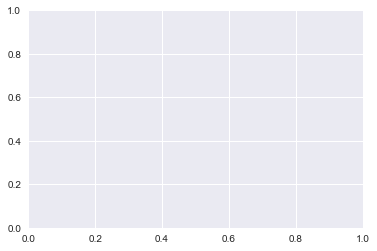

In [14]:
y=df[["Year","Month","Day"]]
plt.scatter(new, y)